In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [12]:
# Load dataset
dataset_path = "emnist-balanced-train.csv"
data = pd.read_csv(dataset_path).to_numpy()


In [13]:

labels = data[:, 0]
images = data[:, 1:]


In [14]:
# Normalize the pixel values
images = images / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


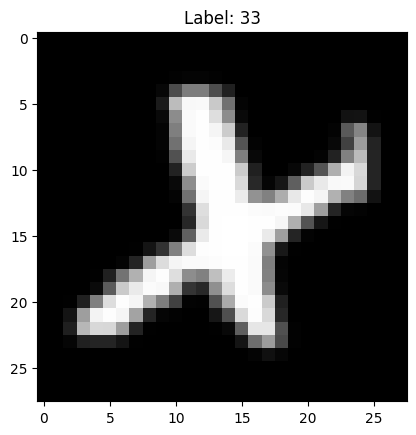

In [15]:
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


In [18]:
mlp_model = MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=200, solver='adam', random_state=42)


In [19]:
mlp_model.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(256, 128), random_state=42)

In [20]:
y_pred_mlp = mlp_model.predict(X_test)
print("MLP Classifier Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp))

MLP Classifier Accuracy: 0.8141843971631205
MLP Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.66      0.60       480
           1       0.49      0.44      0.46       494
           2       0.84      0.84      0.84       477
           3       0.88      0.96      0.91       474
           4       0.90      0.86      0.88       486
           5       0.83      0.87      0.85       498
           6       0.87      0.83      0.85       488
           7       0.93      0.97      0.95       527
           8       0.89      0.82      0.85       465
           9       0.62      0.65      0.64       454
          10       0.91      0.90      0.90       487
          11       0.85      0.91      0.88       469
          12       0.92      0.90      0.91       455
          13       0.88      0.87      0.88       477
          14       0.95      0.88      0.91       466
          15       0.56      0.61      0.59       479
         

In [24]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [25]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [26]:
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classifier Accuracy: 0.8068705673758865
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.65      0.61       480
           1       0.53      0.69      0.60       494
           2       0.84      0.81      0.83       477
           3       0.90      0.92      0.91       474
           4       0.84      0.84      0.84       486
           5       0.79      0.80      0.80       498
           6       0.81      0.85      0.83       488
           7       0.91      0.95      0.93       527
           8       0.77      0.79      0.78       465
           9       0.63      0.79      0.70       454
          10       0.82      0.90      0.86       487
          11       0.81      0.84      0.83       469
          12       0.89      0.89      0.89       455
          13       0.84      0.83      0.84       477
          14       0.92      0.86      0.89       466
          15       0.65      0.51      0.57

In [27]:
print("MLP Classifier Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))

MLP Classifier Accuracy: 0.8141843971631205
Random Forest Classifier Accuracy: 0.8068705673758865


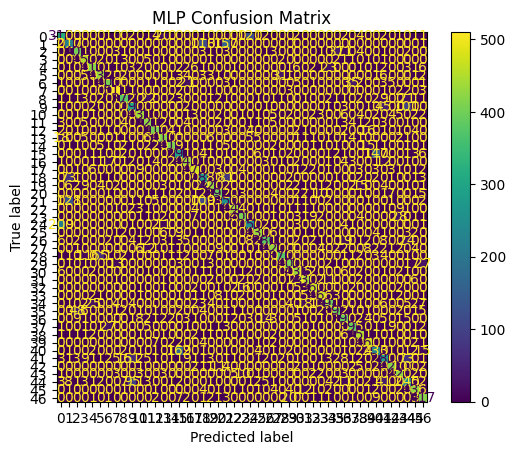

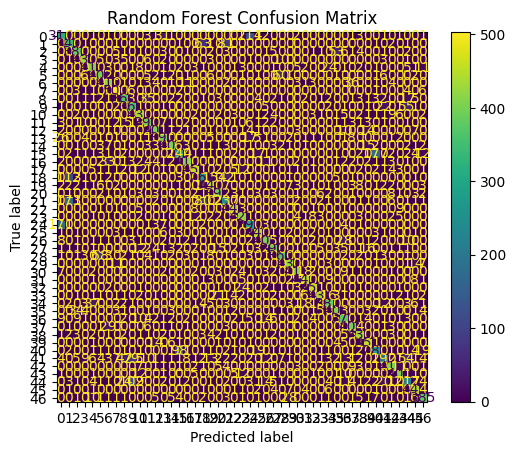

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

# MLP Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mlp)
plt.title("MLP Confusion Matrix")
plt.show()

# Random Forest Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.title("Random Forest Confusion Matrix")
plt.show()